## Résolution de l'équation bi-harmonique

L'équation de départ est l'équation de Navier-Stokes:

\begin{equation}
\frac{\partial \vec{u}}{\partial t} + \vec{u} \cdot \nabla \vec{u} = -\frac{1}{\rho}\nabla p + \nu\nabla^2 \vec{u}
\end{equation}

où $\vec{u}$ est la vitesse du fluide, $P$ est la pression du fluide, $\rho$ est sa densité et $v$ sa viscosité. 

Afin d'obtenir l'écoulement de Stokes, on pose à zéro le membre de gauche de cette équation, ce qui donne:

\begin{equation}
0 = -\nabla p + \nabla^2 \vec{u}
\end{equation}

Nous appliquons ensuite l'opérateur rotationnel à l'équation ci-dessus:

\begin{equation}
\nabla \times \left( - \nabla p + \nabla^2 \vec{u}\right) = 0
\end{equation}

Après avoir posé $$\vec{\omega} = \nabla \times \vec{u},$$ où $\vec{\omega}$ est la vorticité, nous obtenons:

\begin{equation}
\nabla^2 \vec{\omega} = 0
\end{equation}

qui est l'équation de transport pour la vorticité.
Plaçons nous dans le cas à deux dimensions. Le vecteur $u$ peut alors s'écrire 

\begin{equation}
\vec{u} = (u,v,0)
\end{equation}

En introduisant la fonction de flux $\psi$, définie par:
\begin{equation}
u = \frac{\partial \psi}{\partial y} \text{  et   } v = - \frac{\partial \psi}{\partial x}
\end{equation}

la vorticité $\vec{\omega}$ devient alors:
\begin{equation}
\nabla^2 \psi = -\vec{\omega}
\end{equation}

Nous avons donc le système suivant:
\begin{equation}
\nabla^2 \vec{\omega} = 0
\end{equation}
\begin{equation}
\nabla^2 \psi = -\vec{\omega}
\end{equation}

L'équation qu'on extrait pour $\psi$ est appelée équation bi-harmonique:

\begin{equation}
\nabla^4 \psi= 0
\end{equation}

avec $\nabla^4$ étant le bi-laplacien.

C'est l'équation qu'on devra résoudre.

En coordonnées cartésiennes à deux dimensions, l'équation bi-harmonique s'écrit de la manière suivante:

\begin{equation}
\frac{\partial^4 \psi}{\partial x^4} + \frac{\partial^4 \psi}{\partial y^4} + 2\frac{\partial^4 \psi}{\partial x^2 \partial y^2} = 0
\end{equation}

Nous allons l'écrire en termes de différences centrées finies avec une précision du second ordre. En utilisant les coefficients fournis sur la page web [1], nous obtenons, après quelques calculs, la discrétisation suivante (où nous avons posé $\Delta x = \Delta y = \Delta$):

\begin{align*}
\nabla^4 \psi_{i,j} &= 20 \psi_{i,j} - 8(\psi_{i-1,j} + \psi_{i+1,j} + \psi_{i,j-1} + \psi_{i,j+1})\\
&+ 2(\psi_{i+1,j+1} + \psi_{i+1,j-1} + \psi_{i-1,j+1} + \psi_{i-1,j-1})\\
&+ \psi_{i-2,j} + \psi_{i+2,j} + \psi_{i,j-2} + \psi_{i,j+2} \simeq 0
\end{align*}

où $i,j = 0,..,N$.

On place à présent le fluide dans une cavité carrée avec un couvercle mobile. On va résoudre le problème appelé "lid-driven cavity flow". Cela consiste à résoudre l'équation pour le flux $\psi$ du fluide dans la cavité causé par le mouvement du couvercle.
On suppose donc pour les quatre parois qu'on a une condition de non-glissement, c'est à dire que le fluide ne glisse pas sur la surface solide, ce qui implique une vitesse tangentielle du fluide à la surface nulle ($\psi =0 $). La vitesse est nulle dans la direction perpendiculaire à la surface (puisque le fluide ne peut pas la traverser). La cavité possède un couvercle mobile qui se déplace à vitesse constante $u=1$, traduit par la condition $\frac{\partial \psi}{\partial y} =1 $. Toutes les autres parois restent fixes ($\frac{\partial \psi}{\partial x,y} =0 $). Ci-dessous sont représentées schématiquement les conditions aux bords qu'il faudra implémenter:

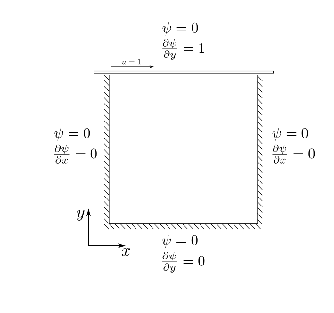

In [6]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from IPython.display import Image
from pylab import imshow,figure, imread

f = pyplot.figure(figsize=(5,5))
image1=pyplot.imread('cavity.png');
pyplot.axis('off')
imshow(image1);

Si nous décomposons notre domaine en $(N+1) \times (N+1)$ points et nous supposons que chaque côté est de longueur L, nous obtenons:

pour $x$:

\begin{align*}
&\psi_{0}=0\\
&\psi_{N}=0\\
&\frac{\partial \psi}{\partial x}(x=0)=0\\
&\frac{\partial \psi}{\partial x}(x=L)=0
\end{align*}


pour $y$:

\begin{align*}
&\psi_{0}=0\\
&\psi_{N}=0\\
&\frac{\partial \psi}{\partial y}(y=0)=0\\
&\frac{\partial \psi}{\partial y}(y=L)=1
\end{align*}

Discrétisons les 4 dérivées partielles ci-dessus. Pour les dérivées en $x=0$ et $y=0$, nous utilisons "Forward finite differences", et pour celles en $x=L$ et $y=L$, nous utilisons "Backward finite differences".

Pour $x$:

\begin{equation}
\frac{\partial \psi}{\partial x}(x=0)=0 \simeq \frac{-3/2 \psi_{0} + 2\psi_{1} - 1/2 \psi_{2}}{\Delta}
\end{equation}

\begin{equation}
\frac{\partial \psi}{\partial x}(x=L)=0 \simeq \frac{3/2 \psi_{N} + -2\psi_{N-1} + 1/2 \psi_{N-2}}{\Delta}
\end{equation}

Comme $\psi_{0}=0$ et $\psi_{N}=0$, 

\begin{equation}
4 \psi_{1} - \psi_{2}=0 \Rightarrow \psi_{2}=4 \psi_{1}
\end{equation}

\begin{equation}
-4 \psi_{N-1} + \psi_{N-2}=0 \Rightarrow \psi_{N-2}=4 \psi_{N-1}
\end{equation}


Pour $y$:

\begin{equation}
\frac{\partial \psi}{\partial y}(y=0)=0 \simeq \frac{-3/2 \psi_{0} + 2\psi_{1} - 1/2 \psi_{2}}{\Delta}
\end{equation}

\begin{equation}
\frac{\partial \psi}{\partial x}(x=L)=1 \simeq \frac{3/2 \psi_{N} -2\psi_{N-1} + 1/2 \psi_{N-2}}{\Delta}
\end{equation}

Comme $\psi_{0}=0$ et $\psi_{N}=0$, 

\begin{equation}
4 \psi_{1} - \psi_{2}=0 \Rightarrow \psi_{2}=4 \psi_{1}
\end{equation}

\begin{equation}
2 \Delta = \psi_{N-2} - 4\psi_{N-1}
\end{equation}

En résumé, les conditions à implémenter sont:

\begin{align*}
&\psi_{0,j} = \psi_{i,0} = \psi_{N,j} = \psi_{i,N} = 0 \\
&\psi_{2,j}=4 \psi_{1,j} \\
&\psi_{i,2}=4 \psi_{i,1} \\
&\psi_{N-2,j}=4 \psi_{N-1,j}\\
& 2 \Delta = \psi_{i,N-2} - 4\psi_{i,N-1}
\end{align*}




Nous appliquons ces conditions à l'équation bi-harmonique discrétisée écrite plus haut.

Par exemple, 

\begin{align*}
\nabla^4 \psi_{i,N-2} &= 20 \psi_{i,N-2} - 8(\psi_{i-1,N-2} + \psi_{i+1,N-2} + \psi_{i,N-3} + \psi_{i,N-1})\\
&+ 2(\psi_{i+1,N-1} + \psi_{i+1,N-3} + \psi_{i-1,N-1} + \psi_{i-1,N-3})\\
&+ \psi_{i-2,N-2} + \psi_{i+2,N-2} + \psi_{i,N-4} + \psi_{i,N} \\
&= 20 \psi_{i,N-2} - 8\left( \psi_{i-1,N-2} + \psi_{i+1,N-2} + \psi_{i,N-3} + \frac{\psi_{i,N-2}}{4} -\Delta/2 \right) \\
&+ 2\left( \frac{\psi_{i+1,N-2}}{4} + \psi_{i+1,N-3} + \frac{\psi_{i-1,N-2}}{4} + \psi_{i-1,N-3} - \Delta \right)\\
&+ \psi_{i-2,N-2} + \psi_{i+2,N-2} + \psi_{i,N-4} \simeq 0
\end{align*} 

Donc

\begin{align*}
&20 \psi_{i,N-2} - 8(\psi_{i-1,N-2} + \psi_{i+1,N-2} + \psi_{i,N-3} + \frac{\psi_{i,N-2}}{4}) \\
&+ 2(\psi_{i+1,N-1} + \psi_{i+1,N-3} + \psi_{i-1,N-1} + \psi_{i-1,N-3})\\
&+ \psi_{i-2,N-2} + \psi_{i+2,N-2} + \psi_{i,N-4} \simeq -2\Delta
\end{align*}

Continuons:

\begin{align*}
\nabla^4 \psi_{i,N-3} 
&= 20 \psi_{i,N-3} - 8(\psi_{i-1,N-3} + \psi_{i+1,N-3} + \psi_{i,N-4} + \psi_{i,N-2})\\
&+ 2(\psi_{i+1,N-2} + \psi_{i+1,N-4} + \psi_{i-1,N-2} + \psi_{i-1,N-4})\\
&+ \psi_{i-2,N-3} + \psi_{i+2,N-3} + \psi_{i,N-5} + \psi_{i,N-1} \\
&= 20 \psi_{i,N-3} - 8(\psi_{i-1,N-3} + \psi_{i+1,N-3} + \psi_{i,N-4} + \psi_{i,N-2}) \\
&+ 2(\psi_{i+1,N-2} + \psi_{i+1,N-4} + \psi_{i-1,N-2} + \psi_{i-1,N-4})\\
&+ \psi_{i-2,N-3} + \psi_{i+2,N-3} + \psi_{i,N-5} + \frac{\psi_{i,N-2}}{4} - \Delta/2 \simeq 0
\end{align*}



Donc 

\begin{align*}
&20 \psi_{i,N-3} - 8(\psi_{i-1,N-3} + \psi_{i+1,N-3} + \psi_{i,N-4} + \psi_{i,N-2}) \\
&+ 2(\psi_{i+1,N-2} + \psi_{i+1,N-4} + \psi_{i-1,N-2} + \psi_{i-1,N-4})\\
&+ \psi_{i-2,N-3} + \psi_{i+2,N-3} + \psi_{i,N-5} + \frac{\psi_{i,N-2}}{4} \simeq \Delta/2
\end{align*}

Nous obtenons donc l'équation $A\psi = b$, où $b_{i}$ est le vecteur suivant:

\begin{align*}
  b_{i} &= \begin{bmatrix}
        0 \\
        0 \\
        \vdots \\
        0 \\
        0 \\
        \vdots \\
        0 \\
        \Delta/2 \\
        -2\Delta\\
        \end{bmatrix}
\end{align*}


Résolvons à présent l'équation bi-harmonique grâce à la méthode des gradients conjugués.

In [1]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [2]:
xmin, xmax = 0.0, 1.0  
ymin, ymax = 0.0, 1.0 

nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

maxiter = 20000
rtol = 1e-8

# On génère une grille 
x = numpy.linspace(xmin, xmax, num=nx)
y = numpy.linspace(ymin, ymax, num=ny)
X, Y = numpy.meshgrid(x, y)

p0 = numpy.zeros((ny, nx)) #p0 est le "initial guess"
b=numpy.zeros((nx,nx))     #On définit le b
b[(nx-5):-3,2:-2]=(dx/2)
b[(nx-4):-2,2:-2]=(-2*dx)

In [3]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [4]:
def bi_harm_conjugate_gradient(p0, maxiter, rtol):
    def A(p):
        # Apply the Bi-Laplacian operator to p.
        return (20*p[2:-2, 2:-2] - 8*p[1:-3, 2:-2] - 8*p[3:-1, 2:-2]
                 -8*p[2:-2, 1:-3] -8*p[2:-2, 3:-1]
                 +2*(p[3:-1, 3:-1] + p[3:-1, 1:-3] + p[1:-3, 3:-1] + p[1:-3, 1:-3])
                 +p[:-4, 2:-2] + p[4:, 2:-2] + p[2:-2, :-4] + p[2:-2, 4:]) 


    p = p0.copy()
    r = numpy.zeros_like(p)  # résidus initial
    Ad = numpy.zeros_like(p)# On définit notre Ad*d0
    Ad[(nx-7):-5,2:-2]=dx/2
    Ad[(nx-6):-4,2:-2]=-4*dx
    Ad[(nx-5):-3,2:-2]=21*(dx/2)
    Ad[(nx-4):-2,2:-2] = -12*dx
    conv = []  # histoire de convergence
    diff = rtol + 1  # différence initiale
    ite = 0  # index d'itération
    # on calcule le résidu initial
    r[2:-2, 2:-2] = b[2:-2, 2:-2] - A(p)
    # La première direction de recherche est le résidu
    d = r.copy()
    while diff > rtol and ite < maxiter:
        pk = p.copy()
        rk = r.copy()
        # On calcule de Laplacien de la direction de recherche
        Ad[2:-2, 2:-2] = A(d)
        # On calcule la longueur du pas
        alpha = numpy.sum(r * r) / numpy.sum(d * Ad)
        # On modifie la solution
        p = pk + alpha * d
        # On modifie le résidu
        r = rk - alpha * Ad
        # On modifie la direction de recherche
        beta = numpy.sum(r * r) / numpy.sum(rk * rk)
        d = r + beta * d
        diff = L1norm(p, pk) #On calcule la différence entre p et pk
        conv.append(diff)   #On stocke la valeur dans la liste
        ite += 1
    p[1:-1,1:2]=(1/4)*p[1:-1,2:3]       #Après que l'algorithme est fini, on utilise les relations afin de trouver les termes au bord
    p[1:-1,-2:-1]=(1/4)*p[1:-1,-3:-2]
    p[1:2,1:-1]=(1/4)*p[2:3,1:-1]
    p[-2:-1,1:-1]=(1/4)*p[-3:-2,1:-1]-(1/2)*dx
    return p, ite, conv

In [13]:
p,ite,conv = bi_harm_conjugate_gradient(p0, maxiter, rtol)
print(ite)

649


Ce nombre nous fournit le nombre d'itérations nécéssaires avant d'atteindre la valeur voulue pour $\psi$.

Les courbes de niveau pour la fonction de flux $\psi$ sont représentées ci-dessous:

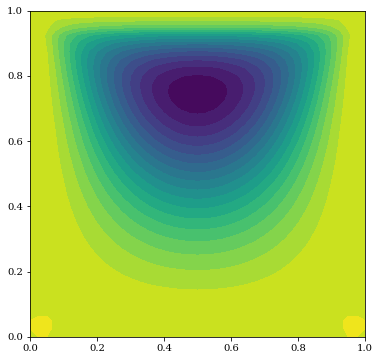

In [7]:
plt.figure(figsize=(6,6))
plt.contourf(X,Y,p,20)

On évalue enfin la fonction $\psi$ aux points (x,y) suivants: (0.6,0.2), (0.6,0.4), (0.6,0.6), (0.6,0.8)

In [9]:
print(p[8,24]) #(0.6,0.2)
print(p[16,24]) #(0.6,0.4)
print(p[24,24]) #(0.6,0.6)
print(p[32,24]) #(0.6,0.8)

-0.043747413741272
-0.165688603459544
-0.33826669735677634
-0.40964395378423324


## Conclusion

Nous avons d'abord discrétisé l'équation bi-harmonique pour pouvoir la résoudre numériquement grâce à la méthode des gradients conjugués. Nous avons ensuite tracé les courbes de niveau pour la fonction de flux $\psi$. Pour finir, nous avons évalué la solution en différents points. Nous constatons qu'il y a bien convergence vers une valeur minimale.

Références:
    
[1] https://en.wikipedia.org/wiki/Finite_difference_coefficient